# Loan Eligibility Prediction

In [744]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder,StandardScaler

# Dataset Overview

In [746]:
train_data=pd.read_csv("C:\\Users\\Lenovo\\Documents\\Ict\\data_sets\\train_ctrUa4K.csv")
test_data=pd.read_csv("C:\\Users\\Lenovo\\Documents\\Ict\\data_sets\\test_lAUu6dG.csv")

In [747]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [748]:
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [749]:
train_data.drop(["Loan_ID"],axis=1,inplace=True)

## Check for Number of rows and coloumns

In [751]:
train_data.shape

(614, 12)

In [752]:
test_data.shape

(367, 12)

## Check for Duplicated rows

In [754]:
train_data.duplicated().sum()

0

In [755]:
test_data.duplicated().sum()

0

## Check for Duplicated columns

In [757]:
train_data.columns.duplicated().sum()

0

In [758]:
test_data.columns.duplicated().sum()

0

## Data description and information

In [760]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [761]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


## Checking Null Values

In [763]:
train_data.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [764]:
#percentage for null values
train_data.isna().sum()/train_data.shape[0]*100

Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [765]:
test_data.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [766]:
test_data.isna().sum()/test_data.shape[0]*100

Loan_ID              0.000000
Gender               2.997275
Married              0.000000
Dependents           2.724796
Education            0.000000
Self_Employed        6.267030
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           1.362398
Loan_Amount_Term     1.634877
Credit_History       7.901907
Property_Area        0.000000
dtype: float64

<Axes: >

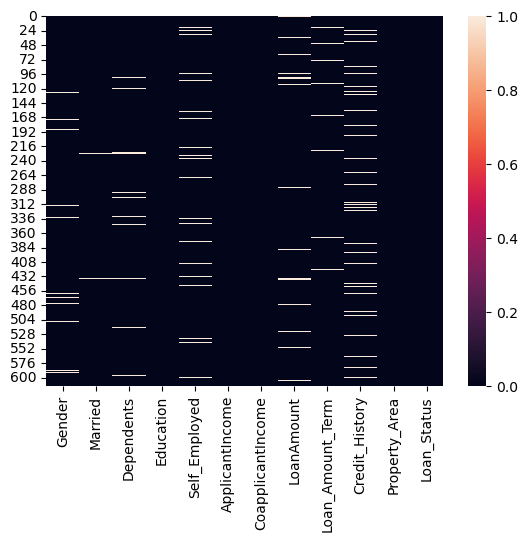

In [767]:
sns.heatmap(train_data.isna())

<Axes: >

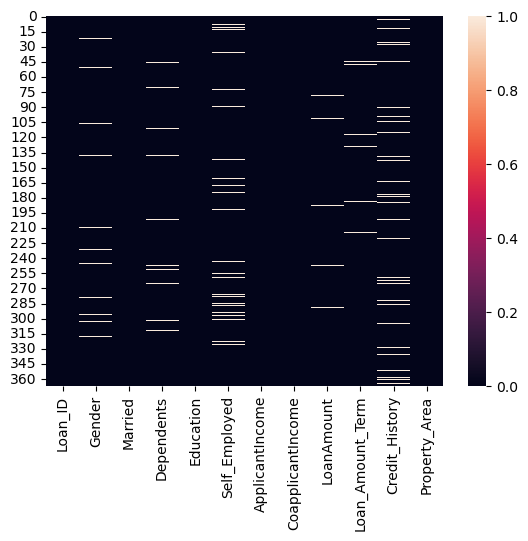

In [768]:
sns.heatmap(test_data.isna())

## Splitting Train Data into numerical and categorical

In [770]:
num_df=train_data.select_dtypes(include='number')
cat_df=train_data.select_dtypes(include='object')

In [771]:
num_df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,NaN,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0


In [772]:
cat_df.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,Urban,Y
1,Male,Yes,1,Graduate,No,Rural,N
2,Male,Yes,0,Graduate,Yes,Urban,Y
3,Male,Yes,0,Not Graduate,No,Urban,Y
4,Male,No,0,Graduate,No,Urban,Y


In [773]:
num_col=num_df.columns.tolist()
cat_col=cat_df.columns.tolist()
print("Numerical columns are:\n{0}\n\nCategorical columns are:\n{1}".format(num_col,cat_col))

Numerical columns are:
['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']

Categorical columns are:
['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


In [774]:
num_df.isna().sum()

ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
dtype: int64

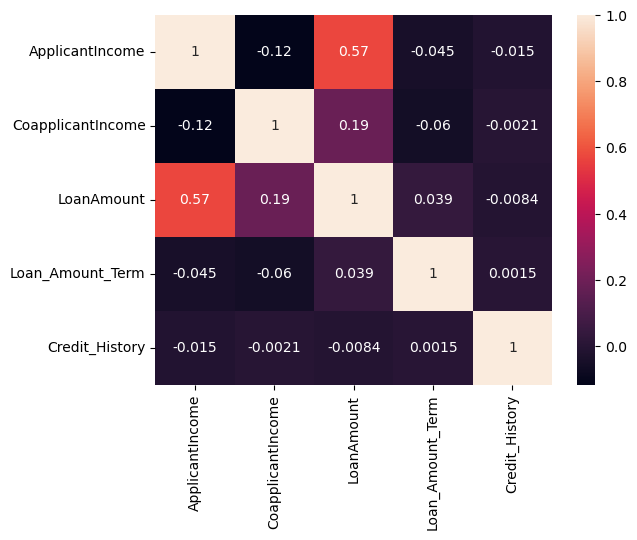

In [775]:
sns.heatmap(num_df.corr(),annot=True)
plt.show()

In [776]:
for col in cat_df:
    print(cat_df[col].value_counts())
    print("")

Gender
Male      489
Female    112
Name: count, dtype: int64

Married
Yes    398
No     213
Name: count, dtype: int64

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64

Self_Employed
No     500
Yes     82
Name: count, dtype: int64

Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64

Loan_Status
Y    422
N    192
Name: count, dtype: int64



## Splitting Test data into categorical and numerical

In [778]:
num_df2=test_data.select_dtypes(include='number')
cat_df2=test_data.select_dtypes(include='object')

In [779]:
#cat_df2.drop(['Loan_ID'],axis=1,inplace=True)
cat_df2

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,Urban
1,LP001022,Male,Yes,1,Graduate,No,Urban
2,LP001031,Male,Yes,2,Graduate,No,Urban
3,LP001035,Male,Yes,2,Graduate,No,Urban
4,LP001051,Male,No,0,Not Graduate,No,Urban
...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,Urban
363,LP002975,Male,Yes,0,Graduate,No,Urban
364,LP002980,Male,No,0,Graduate,No,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,Rural


In [780]:
num_df2

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5720,0,110.0,360.0,1.0
1,3076,1500,126.0,360.0,1.0
2,5000,1800,208.0,360.0,1.0
3,2340,2546,100.0,360.0,NaN
4,3276,0,78.0,360.0,1.0
...,...,...,...,...,...
362,4009,1777,113.0,360.0,1.0
363,4158,709,115.0,360.0,1.0
364,3250,1993,126.0,360.0,NaN
365,5000,2393,158.0,360.0,1.0


In [781]:
num_col2=num_df2.columns.tolist()
cat_col2=cat_df2.columns.tolist()
print("Numerical columns are:\n{0}\n\nCategorical columns are:\n{1}".format(num_col2,cat_col2))

Numerical columns are:
['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']

Categorical columns are:
['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']


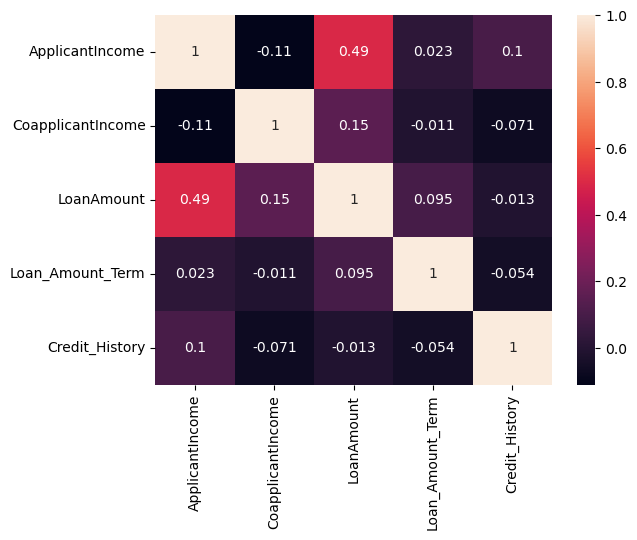

In [782]:
sns.heatmap(num_df2.corr(),annot=True)
plt.show()

In [783]:
for col in cat_df2:
    print(cat_df2[col].value_counts())
    print("")

Loan_ID
LP001015    1
LP002389    1
LP002383    1
LP002376    1
LP002375    1
           ..
LP001627    1
LP001622    1
LP001613    1
LP001611    1
LP002989    1
Name: count, Length: 367, dtype: int64

Gender
Male      286
Female     70
Name: count, dtype: int64

Married
Yes    233
No     134
Name: count, dtype: int64

Dependents
0     200
2      59
1      58
3+     40
Name: count, dtype: int64

Education
Graduate        283
Not Graduate     84
Name: count, dtype: int64

Self_Employed
No     307
Yes     37
Name: count, dtype: int64

Property_Area
Urban        140
Semiurban    116
Rural        111
Name: count, dtype: int64



## Visualising the train numerical data

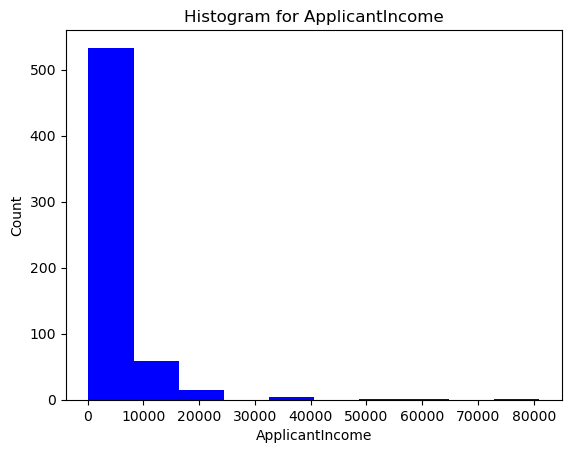

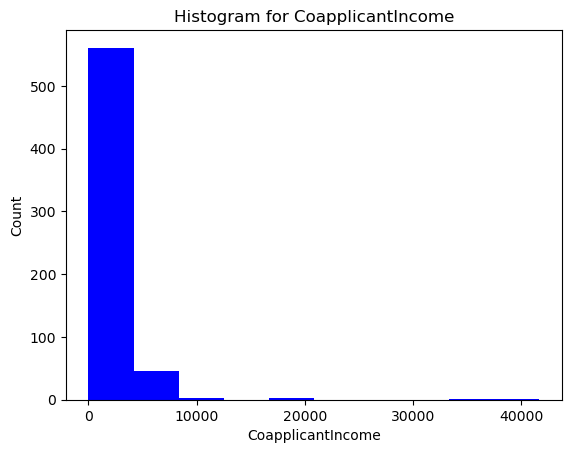

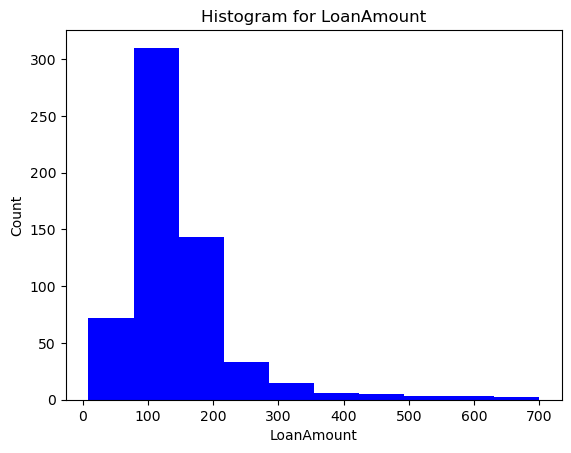

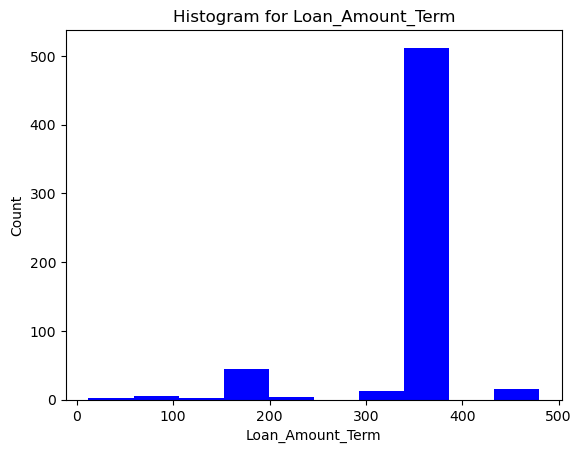

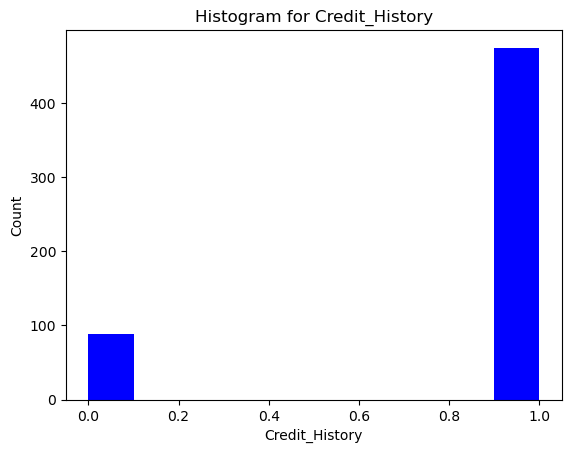

In [785]:
for col in num_col:
    plt.hist(num_df[col],color='b')
    plt.title(f"Histogram for {col}")
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

## Visualising the test numerical data

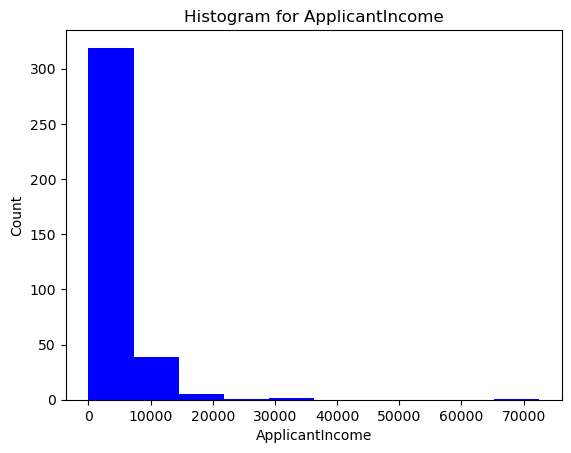

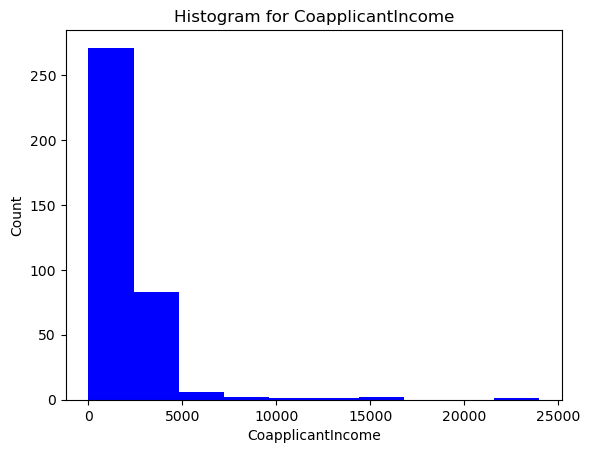

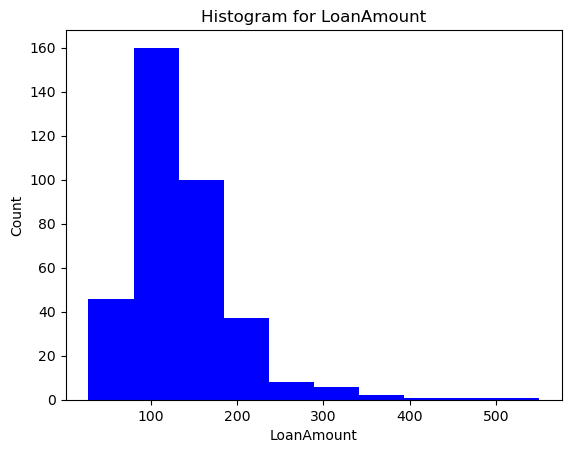

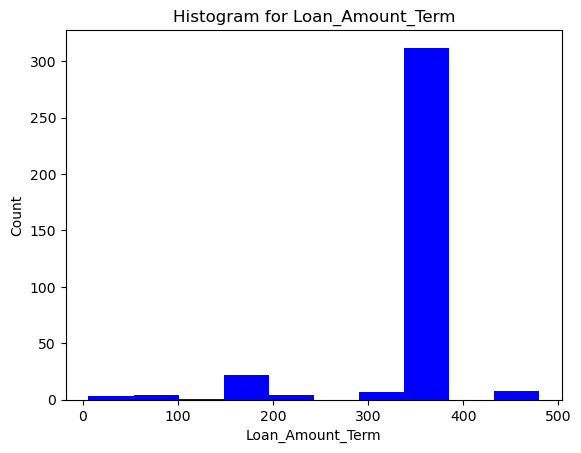

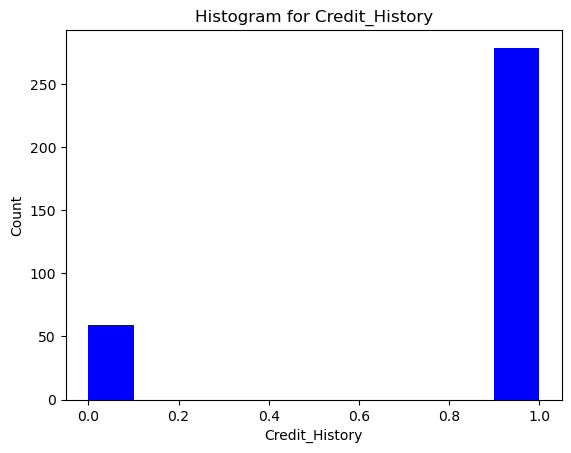

In [787]:
for col in num_col2:
    plt.hist(num_df2[col],color='b')
    plt.title(f"Histogram for {col}")
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

## Imputation

### Replacing Null Values train data

In [790]:
num_df

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,NaN,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0
...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0
610,4106,0.0,40.0,180.0,1.0
611,8072,240.0,253.0,360.0,1.0
612,7583,0.0,187.0,360.0,1.0


In [791]:
for col in num_col:
    num_df[col] = num_df[col].fillna(num_df[col].median())

In [792]:
num_df.isna().sum()

ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
dtype: int64

In [793]:
for col in cat_col:
    cat_df[col]= cat_df[col].fillna(cat_df[col].mode()[0])

In [794]:
cat_df.isna().sum()

Gender           0
Married          0
Dependents       0
Education        0
Self_Employed    0
Property_Area    0
Loan_Status      0
dtype: int64

In [795]:
train_data = pd.concat([cat_df,num_df],axis='columns')

train_data

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,Male,No,0,Graduate,No,Urban,Y,5849,0.0,128.0,360.0,1.0
1,Male,Yes,1,Graduate,No,Rural,N,4583,1508.0,128.0,360.0,1.0
2,Male,Yes,0,Graduate,Yes,Urban,Y,3000,0.0,66.0,360.0,1.0
3,Male,Yes,0,Not Graduate,No,Urban,Y,2583,2358.0,120.0,360.0,1.0
4,Male,No,0,Graduate,No,Urban,Y,6000,0.0,141.0,360.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,Rural,Y,2900,0.0,71.0,360.0,1.0
610,Male,Yes,3+,Graduate,No,Rural,Y,4106,0.0,40.0,180.0,1.0
611,Male,Yes,1,Graduate,No,Urban,Y,8072,240.0,253.0,360.0,1.0
612,Male,Yes,2,Graduate,No,Urban,Y,7583,0.0,187.0,360.0,1.0


### Replacing Null values in test data

In [797]:
num_df2

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5720,0,110.0,360.0,1.0
1,3076,1500,126.0,360.0,1.0
2,5000,1800,208.0,360.0,1.0
3,2340,2546,100.0,360.0,NaN
4,3276,0,78.0,360.0,1.0
...,...,...,...,...,...
362,4009,1777,113.0,360.0,1.0
363,4158,709,115.0,360.0,1.0
364,3250,1993,126.0,360.0,NaN
365,5000,2393,158.0,360.0,1.0


In [798]:
for col in num_col2:
    num_df2[col] = num_df2[col].fillna(num_df2[col].median())

In [799]:
num_df2.isna().sum()

ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
dtype: int64

In [800]:
for col in cat_col2:
    cat_df2[col]= cat_df2[col].fillna(cat_df2[col].mode()[0])

In [801]:
cat_df2.isna().sum()

Loan_ID          0
Gender           0
Married          0
Dependents       0
Education        0
Self_Employed    0
Property_Area    0
dtype: int64

In [802]:
test_data = pd.concat([cat_df2,num_df2],axis='columns')

test_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,LP001015,Male,Yes,0,Graduate,No,Urban,5720,0,110.0,360.0,1.0
1,LP001022,Male,Yes,1,Graduate,No,Urban,3076,1500,126.0,360.0,1.0
2,LP001031,Male,Yes,2,Graduate,No,Urban,5000,1800,208.0,360.0,1.0
3,LP001035,Male,Yes,2,Graduate,No,Urban,2340,2546,100.0,360.0,1.0
4,LP001051,Male,No,0,Not Graduate,No,Urban,3276,0,78.0,360.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,Urban,4009,1777,113.0,360.0,1.0
363,LP002975,Male,Yes,0,Graduate,No,Urban,4158,709,115.0,360.0,1.0
364,LP002980,Male,No,0,Graduate,No,Semiurban,3250,1993,126.0,360.0,1.0
365,LP002986,Male,Yes,0,Graduate,No,Rural,5000,2393,158.0,360.0,1.0


## Outlier Handling

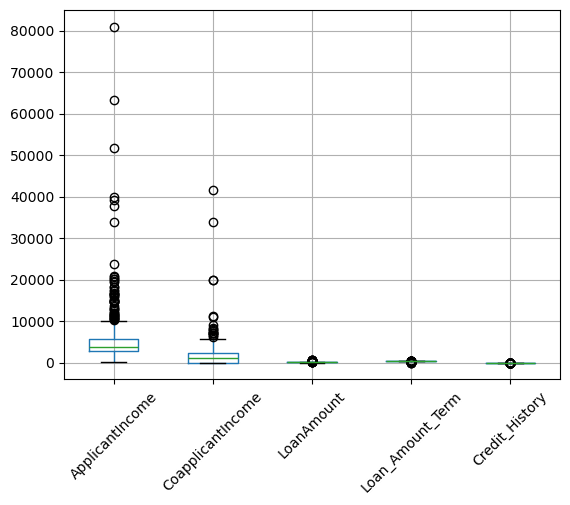

In [804]:
num_df.boxplot()
plt.xticks(rotation=45)
plt.show()

In [805]:
train_data

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,Male,No,0,Graduate,No,Urban,Y,5849,0.0,128.0,360.0,1.0
1,Male,Yes,1,Graduate,No,Rural,N,4583,1508.0,128.0,360.0,1.0
2,Male,Yes,0,Graduate,Yes,Urban,Y,3000,0.0,66.0,360.0,1.0
3,Male,Yes,0,Not Graduate,No,Urban,Y,2583,2358.0,120.0,360.0,1.0
4,Male,No,0,Graduate,No,Urban,Y,6000,0.0,141.0,360.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,Rural,Y,2900,0.0,71.0,360.0,1.0
610,Male,Yes,3+,Graduate,No,Rural,Y,4106,0.0,40.0,180.0,1.0
611,Male,Yes,1,Graduate,No,Urban,Y,8072,240.0,253.0,360.0,1.0
612,Male,Yes,2,Graduate,No,Urban,Y,7583,0.0,187.0,360.0,1.0


### Outlier Handling Test Data

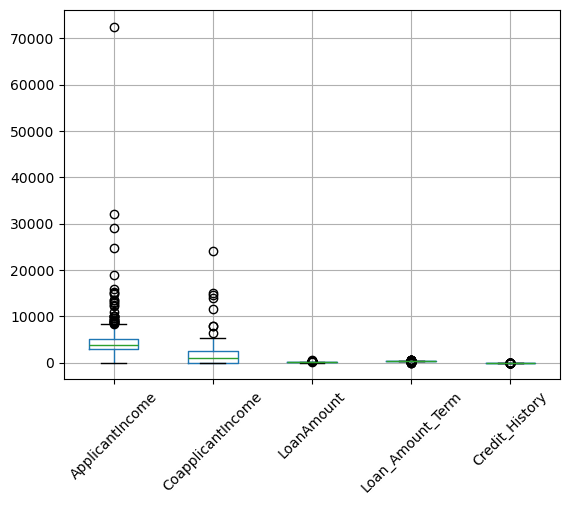

In [807]:
num_df2.boxplot()
plt.xticks(rotation=45)
plt.show()

## Encoding Train Data

In [809]:
label_enc=LabelEncoder()

In [810]:
for col in cat_col:
    train_data[col]=label_enc.fit_transform(train_data[col])
train_data

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,1,0,0,0,0,2,1,5849,0.0,128.0,360.0,1.0
1,1,1,1,0,0,0,0,4583,1508.0,128.0,360.0,1.0
2,1,1,0,0,1,2,1,3000,0.0,66.0,360.0,1.0
3,1,1,0,1,0,2,1,2583,2358.0,120.0,360.0,1.0
4,1,0,0,0,0,2,1,6000,0.0,141.0,360.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,0,1,2900,0.0,71.0,360.0,1.0
610,1,1,3,0,0,0,1,4106,0.0,40.0,180.0,1.0
611,1,1,1,0,0,2,1,8072,240.0,253.0,360.0,1.0
612,1,1,2,0,0,2,1,7583,0.0,187.0,360.0,1.0


In [811]:
train_data.Property_Area.unique()

array([2, 0, 1])

## Encoding Test Dataset

In [813]:
categories=['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area']

In [814]:
for col in categories:
    test_data[col]=label_enc.fit_transform(test_data[col])
test_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,LP001015,1,1,0,0,0,2,5720,0,110.0,360.0,1.0
1,LP001022,1,1,1,0,0,2,3076,1500,126.0,360.0,1.0
2,LP001031,1,1,2,0,0,2,5000,1800,208.0,360.0,1.0
3,LP001035,1,1,2,0,0,2,2340,2546,100.0,360.0,1.0
4,LP001051,1,0,0,1,0,2,3276,0,78.0,360.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,1,1,3,1,1,2,4009,1777,113.0,360.0,1.0
363,LP002975,1,1,0,0,0,2,4158,709,115.0,360.0,1.0
364,LP002980,1,0,0,0,0,1,3250,1993,126.0,360.0,1.0
365,LP002986,1,1,0,0,0,0,5000,2393,158.0,360.0,1.0


## Scaling Train Dataset

In [816]:
num_col=['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term']

In [817]:
scale=StandardScaler()
train_data[num_col]=scale.fit_transform(train_data[num_col])
train_data

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,1,0,0,0,0,2,1,0.072991,-0.554487,-0.211241,0.273231,1.0
1,1,1,1,0,0,0,0,-0.134412,-0.038732,-0.211241,0.273231,1.0
2,1,1,0,0,1,2,1,-0.393747,-0.554487,-0.948996,0.273231,1.0
3,1,1,0,1,0,2,1,-0.462062,0.251980,-0.306435,0.273231,1.0
4,1,0,0,0,0,2,1,0.097728,-0.554487,-0.056551,0.273231,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,0,1,-0.410130,-0.554487,-0.889500,0.273231,1.0
610,1,1,3,0,0,0,1,-0.212557,-0.554487,-1.258378,-2.522836,1.0
611,1,1,1,0,0,2,1,0.437174,-0.472404,1.276168,0.273231,1.0
612,1,1,2,0,0,2,1,0.357064,-0.554487,0.490816,0.273231,1.0


## Scaling Test Dataset

In [819]:
num_col2=['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term']

In [820]:
scale=StandardScaler()
test_data[num_col2]=scale.fit_transform(test_data[num_col2])
test_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,LP001015,1,1,0,0,0,2,0.186461,-0.673335,-0.426780,0.266022,1.0
1,LP001022,1,1,1,0,0,2,-0.352692,-0.029848,-0.163953,0.266022,1.0
2,LP001031,1,1,2,0,0,2,0.039641,0.098849,1.183033,0.266022,1.0
3,LP001035,1,1,2,0,0,2,-0.502774,0.418877,-0.591047,0.266022,1.0
4,LP001051,1,0,0,1,0,2,-0.311909,-0.673335,-0.952433,0.266022,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,1,1,3,1,1,2,-0.162439,0.088982,-0.377500,0.266022,1.0
363,LP002975,1,1,0,0,0,2,-0.132056,-0.369180,-0.344647,0.266022,1.0
364,LP002980,1,0,0,0,0,1,-0.317211,0.181644,-0.163953,0.266022,1.0
365,LP002986,1,1,0,0,0,0,0.039641,0.353241,0.361700,0.266022,1.0


## Modelling

In [822]:
train_data

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,1,0,0,0,0,2,1,0.072991,-0.554487,-0.211241,0.273231,1.0
1,1,1,1,0,0,0,0,-0.134412,-0.038732,-0.211241,0.273231,1.0
2,1,1,0,0,1,2,1,-0.393747,-0.554487,-0.948996,0.273231,1.0
3,1,1,0,1,0,2,1,-0.462062,0.251980,-0.306435,0.273231,1.0
4,1,0,0,0,0,2,1,0.097728,-0.554487,-0.056551,0.273231,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,0,1,-0.410130,-0.554487,-0.889500,0.273231,1.0
610,1,1,3,0,0,0,1,-0.212557,-0.554487,-1.258378,-2.522836,1.0
611,1,1,1,0,0,2,1,0.437174,-0.472404,1.276168,0.273231,1.0
612,1,1,2,0,0,2,1,0.357064,-0.554487,0.490816,0.273231,1.0


In [823]:
test_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,LP001015,1,1,0,0,0,2,0.186461,-0.673335,-0.426780,0.266022,1.0
1,LP001022,1,1,1,0,0,2,-0.352692,-0.029848,-0.163953,0.266022,1.0
2,LP001031,1,1,2,0,0,2,0.039641,0.098849,1.183033,0.266022,1.0
3,LP001035,1,1,2,0,0,2,-0.502774,0.418877,-0.591047,0.266022,1.0
4,LP001051,1,0,0,1,0,2,-0.311909,-0.673335,-0.952433,0.266022,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,1,1,3,1,1,2,-0.162439,0.088982,-0.377500,0.266022,1.0
363,LP002975,1,1,0,0,0,2,-0.132056,-0.369180,-0.344647,0.266022,1.0
364,LP002980,1,0,0,0,0,1,-0.317211,0.181644,-0.163953,0.266022,1.0
365,LP002986,1,1,0,0,0,0,0.039641,0.353241,0.361700,0.266022,1.0


In [895]:
import os
#os.chdir('C:\\Users\\Lenovo\\Documents\\Ict\\data_sets\\Loan prediction')

In [825]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

X=train_data.drop(['Loan_Status'],axis=1)
y=train_data[['Loan_Status']]

# Create models
log_reg = LogisticRegression() # Create logistic regression model
nb = GaussianNB() #Create a Naive Bayes model
knn = KNeighborsClassifier(n_neighbors=5) # Create a KNN classifier
rf = RandomForestClassifier(n_estimators=100) # Random forest classifier

# Train models
log_reg.fit(X, y)
nb.fit(X, y)
knn.fit(X, y)
rf.fit(X, y)

# Make predictions on the test data
y_pred_log_reg = log_reg.predict(test_data.drop(["Loan_ID"],axis=1))
y_pred_nb = nb.predict(test_data.drop(["Loan_ID"],axis=1))
y_pred_knn = knn.predict(test_data.drop(["Loan_ID"],axis=1))
y_pred_rf = rf.predict(test_data.drop(["Loan_ID"],axis=1))

# # we need predictions in Y and N. So let’s convert 1 and 0 to Y and N. 
y_pred_log_reg = np.where(y_pred_log_reg == 1, 'Y', 'N')
y_pred_nb = np.where(y_pred_nb == 1, 'Y', 'N')
y_pred_knn = np.where(y_pred_knn == 1, 'Y', 'N')
y_pred_rf = np.where(y_pred_rf == 1, 'Y', 'N')

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for ex

## Saving as csv file

In [827]:
test_data['Loan_Status']=y_pred_log_reg
test_data[['Loan_ID','Loan_Status']].to_csv('loan_Prediction_logReg.csv',index=False)

test_data['Loan_Status']=y_pred_nb
test_data[['Loan_ID','Loan_Status']].to_csv('loan_Prediction_nb.csv',index=False)

test_data['Loan_Status']=y_pred_knn
test_data[['Loan_ID','Loan_Status']].to_csv('loan_Prediction_knn.csv',index=False)

test_data['Loan_Status']=y_pred_rf
test_data[['Loan_ID','Loan_Status']].to_csv('loan_Prediction_rf.csv',index=False)

In [897]:
os.getcwd()

'C:\\Users\\Lenovo\\Documents\\Ict\\data_sets\\Loan prediction'